<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo21/blob/main/Reto2_Clasificaci%C3%B3n_ensambles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reto Entrega 2**

## **Ciencia y analítica de datos**

## Maestria en Inteligencia Artificial Aplicada

### Equipo 21

Prof: Maria De La Paz Rico

**Alumnos**:

Aurelio Antonio Lozano Rábago A01081266

Javier Muñoz Barrios A01794423

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder


In [ ]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes
import geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();



Objetivos:

1 - Elige una base de datos, ya sea la de aguas superficiales o la de aguas subterraneas.

2 - Limpieza de base de datos.

3 - Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
 - Identificando tendencias centrales promedio, media y mediana de los datos. 
 - Identificar medidas de dispersión, máximo, mínimo .
 - Identificar medidas de posición no centrales , los cuartiles , outliers.   
 - Identificar correlaciones.
 - Preparar los datos 

4 - Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

5 - Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

# 1 - Elige una base de datos


In [6]:
# Cargamos el archivo que está en la siguiente carpeta de Google-Colab:
dfSub = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo21/main/Reto/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', sep=',', encoding='latin-1')

In [7]:
dfSub.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [8]:
dfSub.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [9]:
dfSub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [10]:
dfSub.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


LONGITUD         -101.891007
LATITUD            23.163618
PERIODO          2020.000000
ALC_mg/L          235.633759
CONDUCT_mS/cm    1138.953013
SDT_mg/L                 NaN
dtype: float64

Informacion del conjunto de datos y sus variables:


- CLAVE Clave del sitio de monitoreo

- SITIO Nombre del sitio de muestreo

- ORGANISMO_DE_CUENCA Nombre del Organismo de Cuenca de agua donde se localiza el sitio de monitoreo

- ESTADO Estado donde se encuentra el sitio de muestreo

- MUNICIPIO Municipio donde se encuentra el sitio de muestreo

- ACUIFERO Acu¡fero donde se encuentra el sitio de muestreo

- SUBTIPO Subtipo de cuerpo de agua donde se encuentra el sitio de muestreo

- LONGITUD Coordenada de longitud

- LATITUD Coordenada de latitud

- ANIO/PERIODO Anio o periodo en que se realizo el muestreo

- ALC_mg/L Valor de Alcalinidad Total, en miligramos por litro

- AS_TOT_mg/L Valor de Arsenico Total, en miligramos por litro

- CD_TOT_mg/L Valor de Cadmio Total, en miligramos por litro

- COLI_FEC_NMP/100_mL Valor de Coliformes Fecales, en Numero Mas Probable por 100 mililitros

- CONDUCT_mS/cm Valor de Conductividad en microSiemens por centimetro

- CR_TOT_mg/L Valor de Cromo Total, en miligramos por litro

- DUR_mg/L Valor de Dureza Total, en miligramos por litro

- FE_TOT_mg/L Valor de Hierro Total, en miligramos por litro

- FLUORUROS_mg/L Valor de Fluoruros Totales (F-), en miligramos por litro

- HG_TOT_mg/L Valor de Mercurio Total, en miligramos por litro

- MN_TOT_mg/L Valor de Manganeso Total, en miligramos por litro

- N_NO3_mg/L Valor de Nitrogeno de Nitratos, en miligramos por litro

- PB_TOT_mg/L Valor de Plomo Total, en miligramos por litro

- SDT_M_mg/L Valor de Solidos Disueltos Totales-Medidos, en miligramos por litro

- SDT_mg/L Valor de Solidos Disueltos Totales, en miligramos por litro

- CALIDAD_ALC Clasificacion de la calidad del agua de acuerdo con el indicador Alcalinidad Total

- CALIDAD_AS Clasificacion de la calidad del agua de acuerdo con el indicador Arsenico Total

- CALIDAD_CD Clasificacion de la calidad del agua de acuerdo con el indicador Cadmio Total

- CALIDAD_COLI_FEC Clasificacion de la calidad del agua de acuerdo con el indicador Coliformes Fecales

- CALIDAD_CONDUC Clasificacion de la calidad del agua de acuerdo con el indicador Conductividad

- CALIDAD_CR Clasificacion de la calidad del agua de acuerdo con el indicador Cromo Total

- CALIDAD_DUR Clasificacion de la calidad del agua de acuerdo con el indicador Dureza Total

- CALIDAD_FE Clasificacion de la calidad del agua de acuerdo con el indicador Hierro Total

- CALIDAD_FLUO Clasificacion de la calidad del agua de acuerdo con el indicador Fluoruros Totales

- CALIDAD_HG Clasificacion de la calidad del agua de acuerdo con el indicador Mercurio Total

- CALIDAD_MN Clasificacion de la calidad del agua de acuerdo con el indicador Manganeso Total

- CALIDAD_N_NO3 Clasificacion de la calidad del agua de acuerdo con el indicador Nitrogeno de Nitratos

- CALIDAD_PB Clasificacion de la calidad del agua de acuerdo con el indicador Plomo Total

- CALIDAD_SDT_ra Clasificacion de la calidad del agua de acuerdo con el indicador de los Solidos Disueltos Totales (Riego agricola)

- CALIDAD_SDT_salin Clasificacion de la calidad del agua de acuerdo con el indicador de los Solidos Disueltos Totales (Salinizacion)

- CUMPLE_CON_ALC Indica si cumple con la calidad de Baja, Media, o Alta para el Indicador Alcalinidad Total

- CUMPLE_CON_AS Indica si cumple con la calidad de Potable - Excelente o Apta como FAAP, para el Indicador Arsenico Total

- CUMPLE_CON_CD Indica si cumple con la calidad de Potable - Excelente, para el Indicador Cadmio Total

- CUMPLE_CON_CF Indica si cumple con la calidad de Potable - Excelente, o Buena calidad, Aceptable, para el Indicador Coliformes Fecales

- CUMPLE_CON_COND Indica si cumple con la calidad de Excelente para riego, Buena para riego, o Permisible para riego, para el Indicador Conduc

- CUMPLE_CON_CR Indica si cumple con la calidad de Potable - Excelente, para el Indicador Cromo Total

- CUMPLE_CON_DUR Indica si cumple con la calidad de Potable - Suave, Potable - Moderadamente suave, o Potable - Dura, para el Indicador Dur

- CUMPLE_CON_FE Indica si cumple con la calidad de Potable - Excelente, para el Indicador Hierro Total

- CUMPLE_CON_FLUO Indica si cumple con la calidad de Baja, Media, o Potable - Optima, para el Indicador Fluoruros Totales

- CUMPLE_CON_HG Indica si cumple con la calidad de Potable - Excelente, para el Indicador Mercurio Total

- CUMPLE_CON_MN Indica si cumple con la calidad de Potable - Excelente, para el Indicador Manganeso Total

- CUMPLE_CON_NO3 Indica si cumple con la calidad de Potable - Excelente o Potable - Buena calidad, para el Indicador Nitrogeno de Nitratos

- CUMPLE_CON_PB Indica si cumple con la calidad de Potable - Excelente, para el Indicador Plomo Total

- CUMPLE_CON_SDT_ra Indica si cumple con la calidad de Excelente para riego, Cultivos sensibles o Cultivos con manejo especial, para el Indicador

- CUMPLE_CON_SDT_salin Indica si cumple con la calidad de Potable - Dulce o Ligeramente salobres, para el Indicador Solidos Disueltos Totales (Salin

- CONTAMINANTES Contaminantes presentes en incumplimiento (Contaminados)

- SEMAFORO Indica el nivel de contaminacion de acuerdo a los contaminantes presentes

# 2 - Limpieza de base de datos.

Hacemos una limpieza del conjunto de datos referentes a la calidad de Aguas Subterraneas en Mexico

In [351]:
#Selecionamos la base de datos de Aguas Superficiales 
dfSubLimpio = dfSub.copy()

Analizamos si existen Datos nulos detro de nuestro conjunto de datos

In [352]:
dfSubLimpio.isnull().sum().to_frame(name='total_nulos').query('total_nulos > 0')

,total_nulos
ALC_mg/L,4
CALIDAD_ALC,4
CONDUCT_mS/cm,6
CALIDAD_CONDUC,6
SDT_mg/L,1068
SDT_M_mg/L,2
CALIDAD_SDT_ra,2
CALIDAD_SDT_salin,2
DUR_mg/L,1
CALIDAD_DUR,1


Eliminaremos la variable "SDT_mg/L" que corresponde a "El Valor de los Solidos Disueltos Totales". En este caso particular cuenta con perdidad de datos y no aporta a nuestro modelo final. 


In [353]:
dfSubLimpio.drop('SDT_mg/L',axis=1,inplace=True)

Asi mismo eliminaremos columnas que no aportan para nuestro modelo, en es pecial Estado y Municipio pueden ser obtenidos con la latitud y logitud

In [354]:
dfSubLimpio.drop(['SITIO','ORGANISMO_DE_CUENCA','ESTADO','MUNICIPIO','ACUIFERO','PERIODO'],axis=1,inplace=True)

In [355]:
dfSubLimpio.head(1)

,CLAVE,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO,-102.0221,22.20887,229.99,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


Analisamos las variables Categoricas

In [356]:
ColumnasOrdinales = ['SUBTIPO','CALIDAD_ALC','CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin',
                     'CALIDAD_FLUO','CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS',
                     'CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE']
dfSubLimpio[ColumnasOrdinales].head()

,SUBTIPO,CALIDAD_ALC,CALIDAD_CONDUC,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CALIDAD_FLUO,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,CALIDAD_CD,CALIDAD_CR,CALIDAD_HG,CALIDAD_PB,CALIDAD_MN,CALIDAD_FE
0,POZO,Alta,Permisible para riego,Cultivos sensibles,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Excelente,Apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente
1,POZO,Alta,Buena para riego,Excelente para riego,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Buena calidad,Apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente
2,POZO,Alta,Buena para riego,Excelente para riego,Potable - Dulce,Alta,Potable - Dura,Potable - Excelente,Potable - Excelente,No apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente
3,POZO,Alta,Buena para riego,Excelente para riego,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Excelente,Apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente
4,POZO,Alta,Permisible para riego,Cultivos con manejo especial,Ligeramente salobres,Baja,Potable - Dura,Aceptable,No apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente


In [357]:
#Revisamos los valores de cada variable
print('Categorias por Variable \n')
for i in ColumnasOrdinales:
  print('------ {} -------'.format(i))
  print(dfSubLimpio[i].unique())
  print('\n')

Categorias por Variable 

------ SUBTIPO -------
['POZO' 'MANANTIAL' 'NORIA' 'POZO NORIA' 'DESCARGA' 'Pozo' 'CENOTE'
 'BOMBEO CENOTE']


------ CALIDAD_ALC -------
['Alta' 'Media' 'Baja' 'Indeseable como FAAP' nan]


------ CALIDAD_CONDUC -------
['Permisible para riego' 'Buena para riego' 'Dudosa para riego'
 'Indeseable para riego' nan 'Excelente para riego']


------ CALIDAD_SDT_ra -------
['Cultivos sensibles' 'Excelente para riego'
 'Cultivos con manejo especial' 'Cultivos tolerantes'
 'Indeseable para riego' nan]


------ CALIDAD_SDT_salin -------
['Potable - Dulce' 'Ligeramente salobres' 'Salobres' 'Salinas' nan]


------ CALIDAD_FLUO -------
['Potable - Optima' 'Alta' 'Baja' 'Media']


------ CALIDAD_DUR -------
['Potable - Dura' 'Muy dura e indeseable usos industrial y domestico'
 'Potable - Suave' 'Potable - Moderadamente suave' nan]


------ CALIDAD_COLI_FEC -------
['Potable - Excelente' 'Aceptable' 'Contaminada' 'Buena calidad'
 'Fuertemente contaminada']


------ CALIDAD_

In [358]:
le = LabelEncoder()
k=0
for k in ColumnasOrdinales:
  label = le.fit_transform(dfSubLimpio[k])
  dfSubLimpio[k]=label 

In [359]:
dfSubLimpio[ColumnasOrdinales].head()

,SUBTIPO,CALIDAD_ALC,CALIDAD_CONDUC,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CALIDAD_FLUO,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,CALIDAD_CD,CALIDAD_CR,CALIDAD_HG,CALIDAD_PB,CALIDAD_MN,CALIDAD_FE
0,5,0,4,1,1,3,1,4,2,0,1,1,1,1,0,0
1,5,0,0,3,1,3,1,4,1,0,1,1,1,1,0,0
2,5,0,0,3,1,0,1,4,2,1,1,1,1,1,0,0
3,5,0,0,3,1,3,1,4,2,0,1,1,1,1,0,0
4,5,0,4,0,0,1,1,0,0,2,1,1,1,1,0,0


Analizamos las variables Numericas Cuantitativas

In [360]:
#removemos los < de las columnas y reemplazaremos por 0 por que son valores menores a los que importan
ColumnasCuantitativas=['SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L',
                       'CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']


In [361]:
dfSubLimpio[ColumnasCuantitativas].head(1)

,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891


In [362]:
# Limpiamos las variables de objeto a numericas. 
for k in ColumnasCuantitativas:
  dfSubLimpio[k]=dfSubLimpio[k].str.replace('<', '',regex=True) 
  dfSubLimpio[k]=dfSubLimpio[k].replace(np.nan, 0) 
list_test = dict(zip(ColumnasCuantitativas, ['float' for i in ColumnasCuantitativas]))
dfSubLimpio[ColumnasCuantitativas] = dfSubLimpio[ColumnasCuantitativas].astype(float)
# dfSubLimpio.astype(list_test)

In [363]:
dfSubLimpio[ColumnasCuantitativas].info() # comprobamos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SDT_M_mg/L           1068 non-null   float64
 1   FLUORUROS_mg/L       1068 non-null   float64
 2   DUR_mg/L             1068 non-null   float64
 3   COLI_FEC_NMP/100_mL  1068 non-null   float64
 4   N_NO3_mg/L           1068 non-null   float64
 5   AS_TOT_mg/L          1068 non-null   float64
 6   CD_TOT_mg/L          1068 non-null   float64
 7   CR_TOT_mg/L          1068 non-null   float64
 8   HG_TOT_mg/L          1068 non-null   float64
 9   PB_TOT_mg/L          1068 non-null   float64
 10  MN_TOT_mg/L          1068 non-null   float64
 11  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(12)
memory usage: 100.2 KB


In [364]:
dfSubLimpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SUBTIPO               1068 non-null   int64  
 2   LONGITUD              1068 non-null   float64
 3   LATITUD               1068 non-null   float64
 4   ALC_mg/L              1064 non-null   float64
 5   CALIDAD_ALC           1068 non-null   int64  
 6   CONDUCT_mS/cm         1062 non-null   float64
 7   CALIDAD_CONDUC        1068 non-null   int64  
 8   SDT_M_mg/L            1068 non-null   float64
 9   CALIDAD_SDT_ra        1068 non-null   int64  
 10  CALIDAD_SDT_salin     1068 non-null   int64  
 11  FLUORUROS_mg/L        1068 non-null   float64
 12  CALIDAD_FLUO          1068 non-null   int64  
 13  DUR_mg/L              1068 non-null   float64
 14  CALIDAD_DUR           1068 non-null   int64  
 15  COLI_FEC_NMP/100_mL  

In [365]:
dfSubLimpio.head()

,CLAVE,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,5,-102.02210,22.20887,229.990,0,940.0,4,603.6,1,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,5,-102.20075,21.99958,231.990,0,608.0,0,445.4,3,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,5,-102.28801,22.36685,204.920,0,532.0,0,342.0,3,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,5,-102.29449,22.18435,327.000,0,686.0,0,478.6,3,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,5,-110.24480,23.45138,309.885,0,1841.0,4,1179.0,0,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


imputamos con media 

In [366]:
ColumnasCuantitativasMedia=['ALC_mg/L','CONDUCT_mS/cm']
dfSubLimpio[ColumnasCuantitativasMedia] = dfSubLimpio[ColumnasCuantitativasMedia].fillna(dfSubLimpio.mean())
# dfSubLimpio[ColumnasCuantitativasMedia].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Analizamos las variables restantes

In [367]:
dfSubLimpio['SEMAFORO'].value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [368]:
#no son valores binarios, hay columnas que tienen NO SI y ND (no estoy seguro que ND sea valido o si es un error y debería ser No)
ColumnasBinarias = ['CUMPLE_CON_ALC','CUMPLE_CON_COND','CUMPLE_CON_SDT_ra','CUMPLE_CON_SDT_salin',
                    'CUMPLE_CON_FLUO','CUMPLE_CON_DUR','CUMPLE_CON_CF','CUMPLE_CON_NO3',
                    'CUMPLE_CON_AS','CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG','CUMPLE_CON_PB',
                    'CUMPLE_CON_MN','CUMPLE_CON_FE','SEMAFORO']
# dfSubLimpio['CUMPLE_CON_SDT_ra'].value_counts()

In [369]:
le = LabelEncoder()
k=0
for k in ColumnasBinarias:
  label = le.fit_transform(dfSubLimpio[k])
  dfSubLimpio[k]=label 

In [370]:
dfSubLimpio.head(2) # revisamos si transformamos correctamente

,CLAVE,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,5,-102.02210,22.20887,229.99,0,940.0,4,603.6,1,...,2,1,2,1,1,1,1,1,1,1
1,DLAGU6516,5,-102.20075,21.99958,231.99,0,608.0,0,445.4,3,...,2,1,2,1,1,1,1,1,1,1


Revisamos si alguna columna tiene NaN.

In [371]:
dfSubLimpio.isna().any()

CLAVE                   False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
ALC_mg/L                False
CALIDAD_ALC             False
CONDUCT_mS/cm           False
CALIDAD_CONDUC          False
SDT_M_mg/L              False
CALIDAD_SDT_ra          False
CALIDAD_SDT_salin       False
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                False
CALIDAD_DUR             False
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L              False
CALIDAD_N_NO3           False
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG              False
PB_TOT_mg/L             False
CALIDAD_PB              False
MN_TOT_mg/L             False
CALIDAD_MN              False
FE_TOT_mg/L             False
CALIDAD_FE              False
SEMAFORO  

In [372]:
# Movemos la variable semaforo hasta el final del dataset.
df1 = dfSubLimpio.pop('SEMAFORO') # 
dfSubLimpio['SEMAFORO']=df1 # 

In [373]:
dfSubLimpio.head()

,CLAVE,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,SEMAFORO
0,DLAGU6,5,-102.02210,22.20887,229.990,0,940.0,4,603.6,1,...,1,2,1,1,1,1,1,1,1,2
1,DLAGU6516,5,-102.20075,21.99958,231.990,0,608.0,0,445.4,3,...,1,2,1,1,1,1,1,1,1,2
2,DLAGU7,5,-102.28801,22.36685,204.920,0,532.0,0,342.0,3,...,1,2,0,1,1,1,1,1,1,1
3,DLAGU9,5,-102.29449,22.18435,327.000,0,686.0,0,478.6,3,...,1,2,1,1,1,1,1,1,1,2
4,DLBAJ107,5,-110.24480,23.45138,309.885,0,1841.0,4,1179.0,0,...,1,1,1,1,1,1,1,1,1,1


In [374]:
dfSubLimpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SUBTIPO               1068 non-null   int64  
 2   LONGITUD              1068 non-null   float64
 3   LATITUD               1068 non-null   float64
 4   ALC_mg/L              1068 non-null   float64
 5   CALIDAD_ALC           1068 non-null   int64  
 6   CONDUCT_mS/cm         1068 non-null   float64
 7   CALIDAD_CONDUC        1068 non-null   int64  
 8   SDT_M_mg/L            1068 non-null   float64
 9   CALIDAD_SDT_ra        1068 non-null   int64  
 10  CALIDAD_SDT_salin     1068 non-null   int64  
 11  FLUORUROS_mg/L        1068 non-null   float64
 12  CALIDAD_FLUO          1068 non-null   int64  
 13  DUR_mg/L              1068 non-null   float64
 14  CALIDAD_DUR           1068 non-null   int64  
 15  COLI_FEC_NMP/100_mL  

# 3 - Explorar  datos 
(auxiliate de describe(), mean(), plot, boxplot de pandas):
 - Identificando tendencias centrales promedio, media y mediana de los datos. 
 - Identificar medidas de dispersión, máximo, mínimo .
 - Identificar medidas de posición no centrales , los cuartiles , outliers.   
 - Identificar correlaciones.
 - Preparar los datos 

In [375]:
VariablesFinales = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

In [376]:
dfSubLimpio.describe()

,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,SEMAFORO
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,...,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,4.946629,-101.891007,23.163618,235.633759,0.673221,1138.953013,2.045880,894.423474,1.855805,0.985019,...,0.942884,1.921348,0.881086,0.998127,0.985955,0.999064,0.988764,0.919476,0.872659,1.175094
std,0.435059,6.703263,3.887670,116.655014,1.194706,1242.056683,1.874895,2749.223869,1.186378,0.652125,...,0.232173,0.272778,0.323839,0.043254,0.117731,0.030600,0.105452,0.272231,0.333511,0.779456
min,0.000000,-116.664250,14.561150,26.640000,0.000000,50.400000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,-105.388865,20.212055,164.048750,0.000000,505.500000,0.000000,337.383325,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,-102.174180,22.617190,215.825000,0.000000,822.500000,2.000000,548.600000,2.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,5.000000,-98.974716,25.510285,292.423750,1.000000,1321.250000,4.000000,915.900000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,7.000000,-86.864120,32.677713,1650.000000,4.000000,18577.000000,5.000000,82170.000000,5.000000,4.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


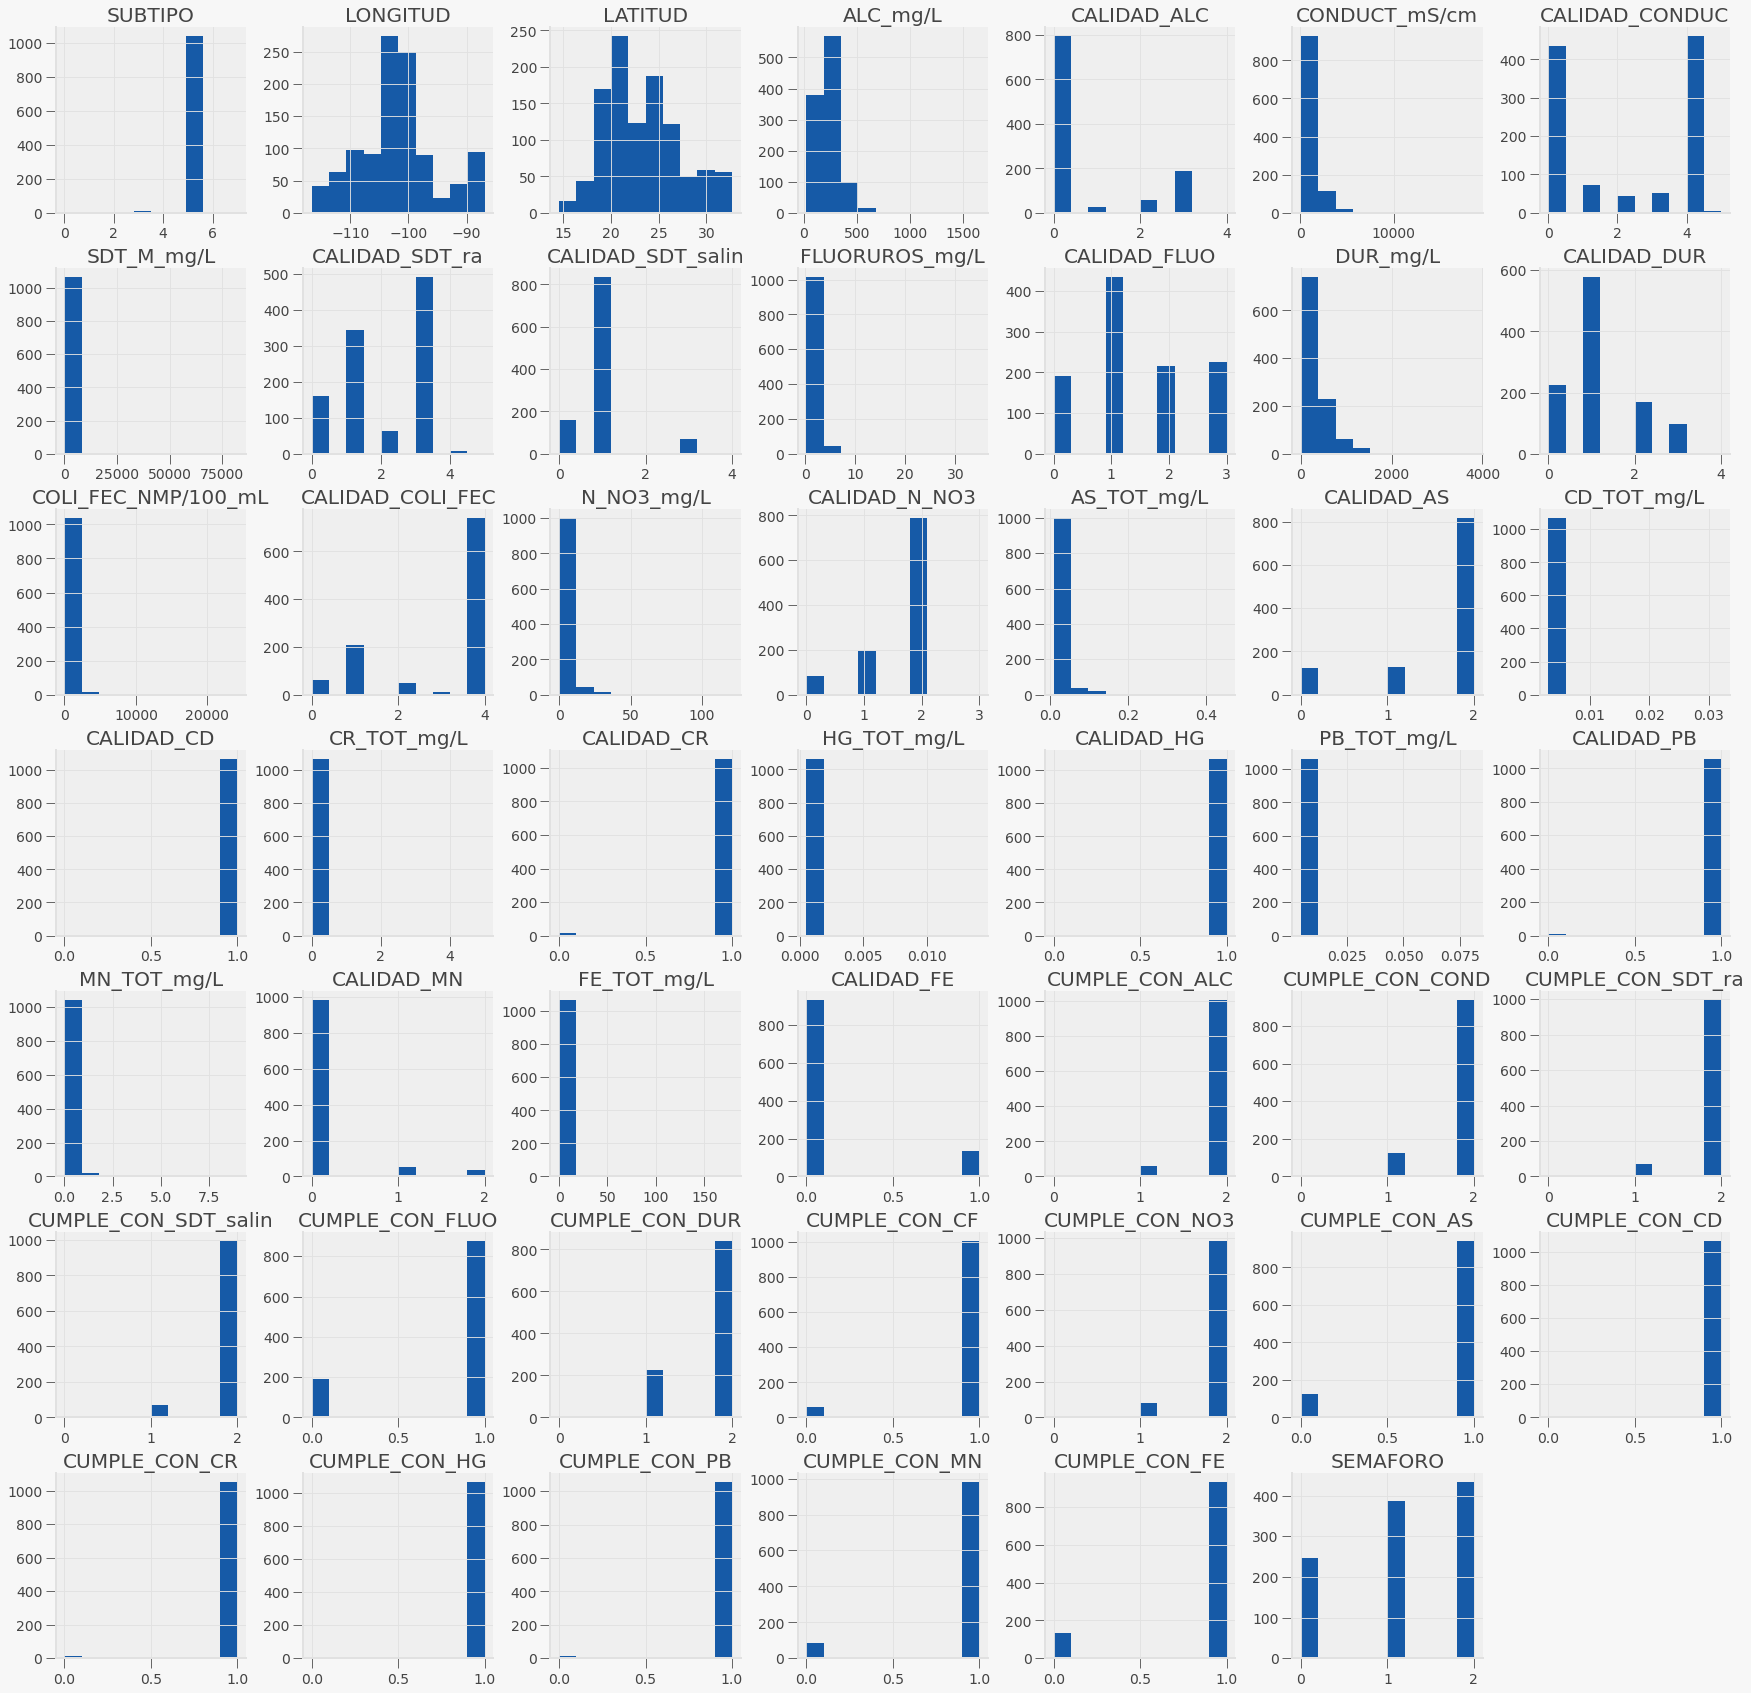

In [377]:
fig, gax = plt.subplots(figsize=(30,30))
dfSubLimpio.hist(ax=gax)
plt.show()

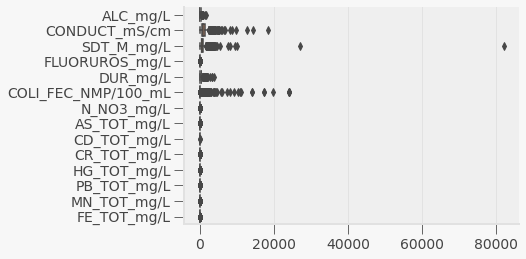

In [378]:
sns.boxplot(data=dfSubLimpio[VariablesFinales], orient="h")

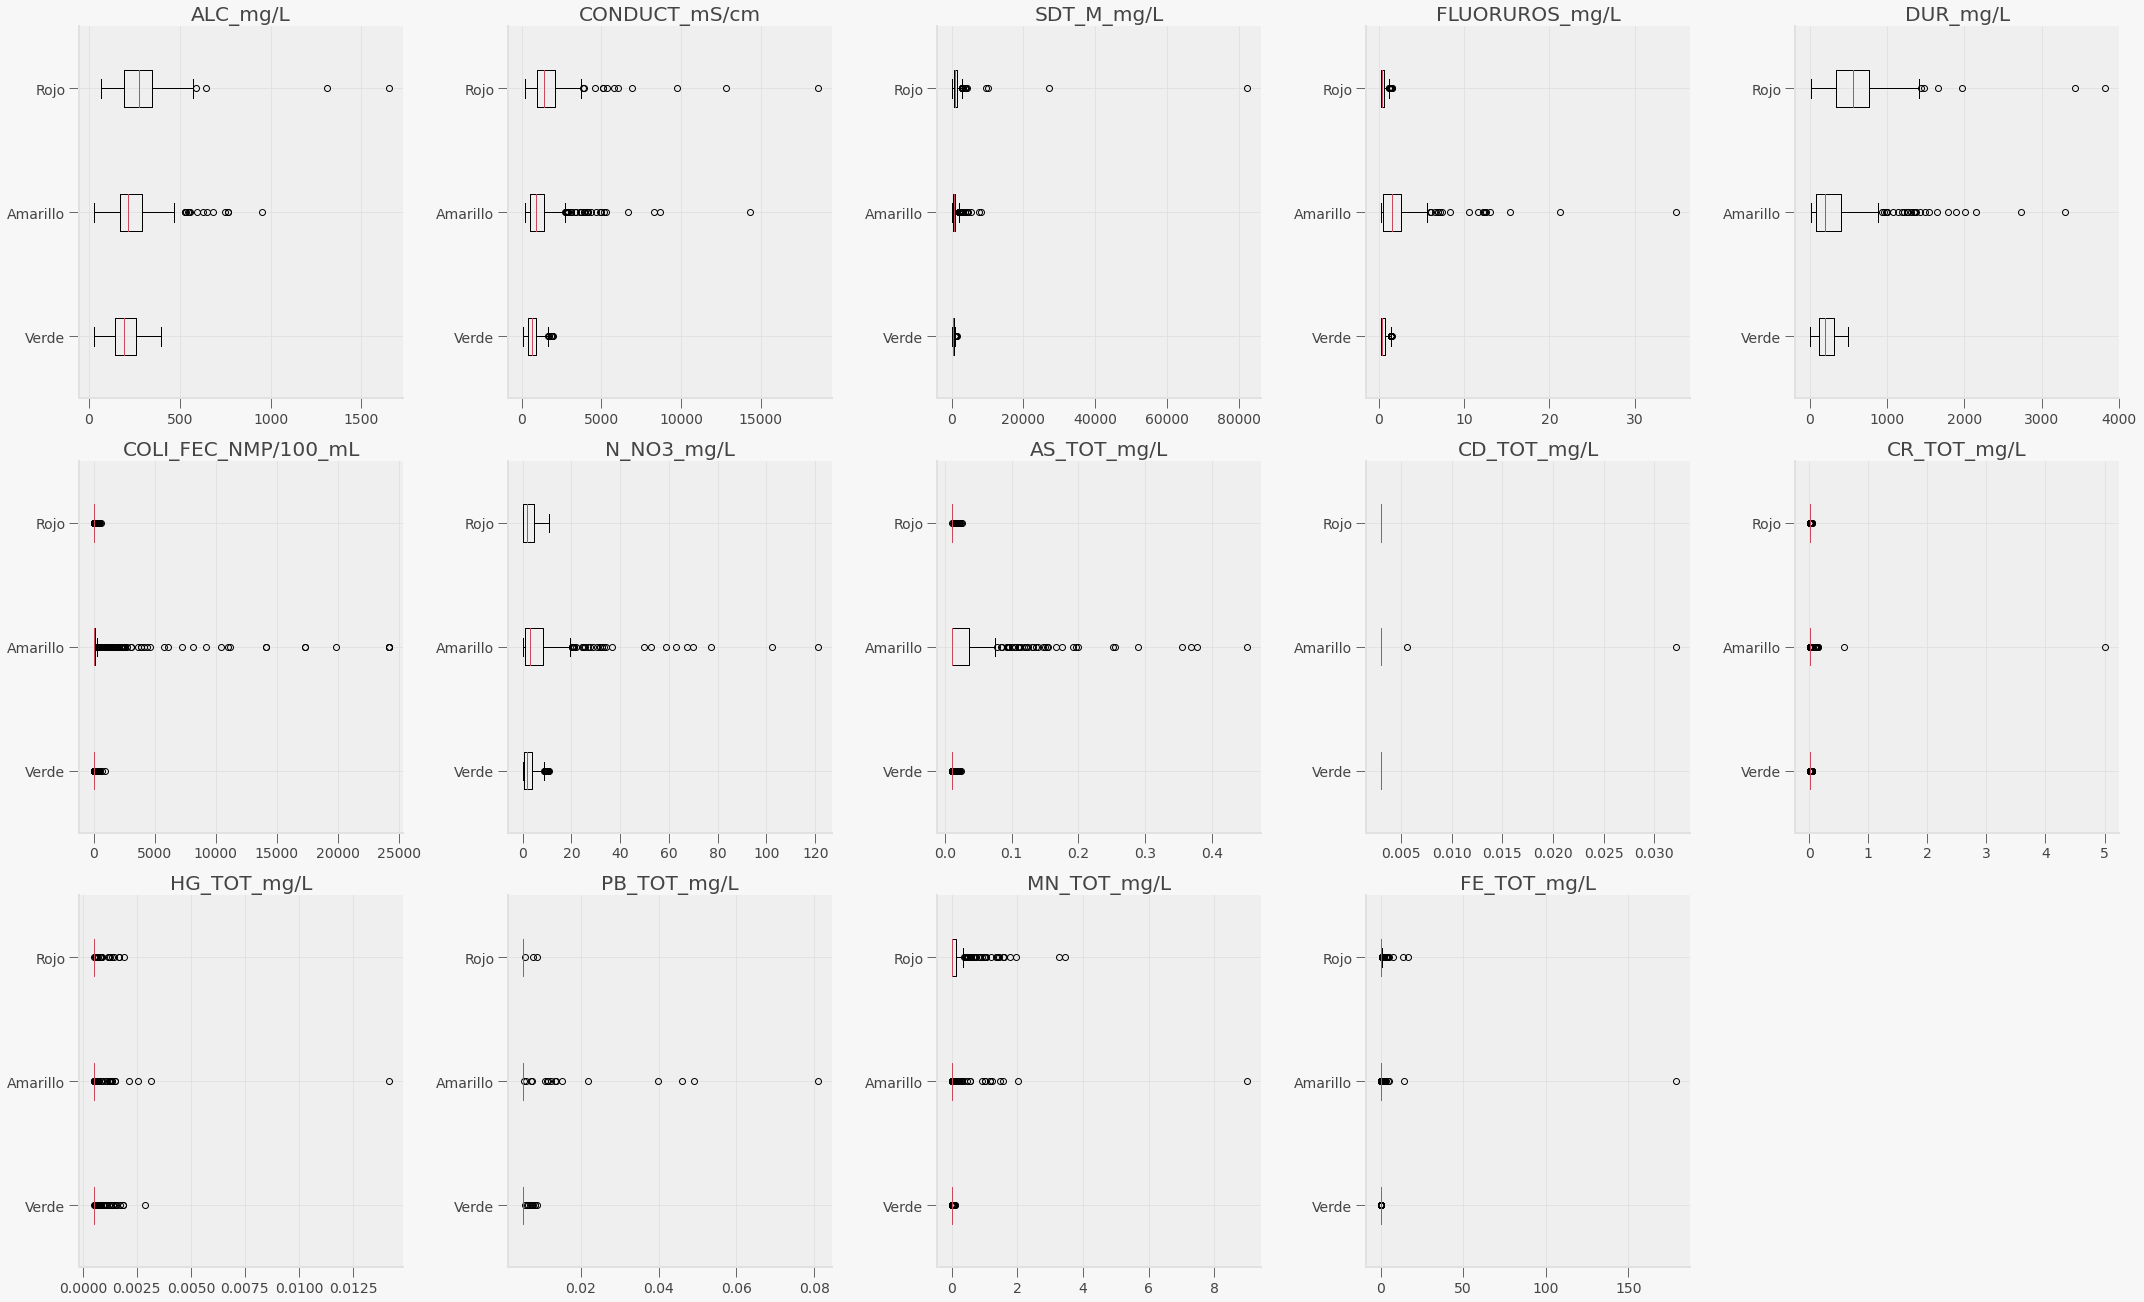

In [379]:
possibilities = dfSubLimpio.SEMAFORO.unique()
box_sr = pd.Series('',index = possibilities)
plt.figure(figsize=(30,30))
for i,sc in enumerate(VariablesFinales):
    for poss in possibilities:
        BM = dfSubLimpio.SEMAFORO == poss
        box_sr[poss] = dfSubLimpio[BM][sc].values
    plt.subplot(5,5,i+1)
    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2,3],['Verde','Amarillo','Rojo'])
    plt.title(sc)
plt.tight_layout()
plt.show()

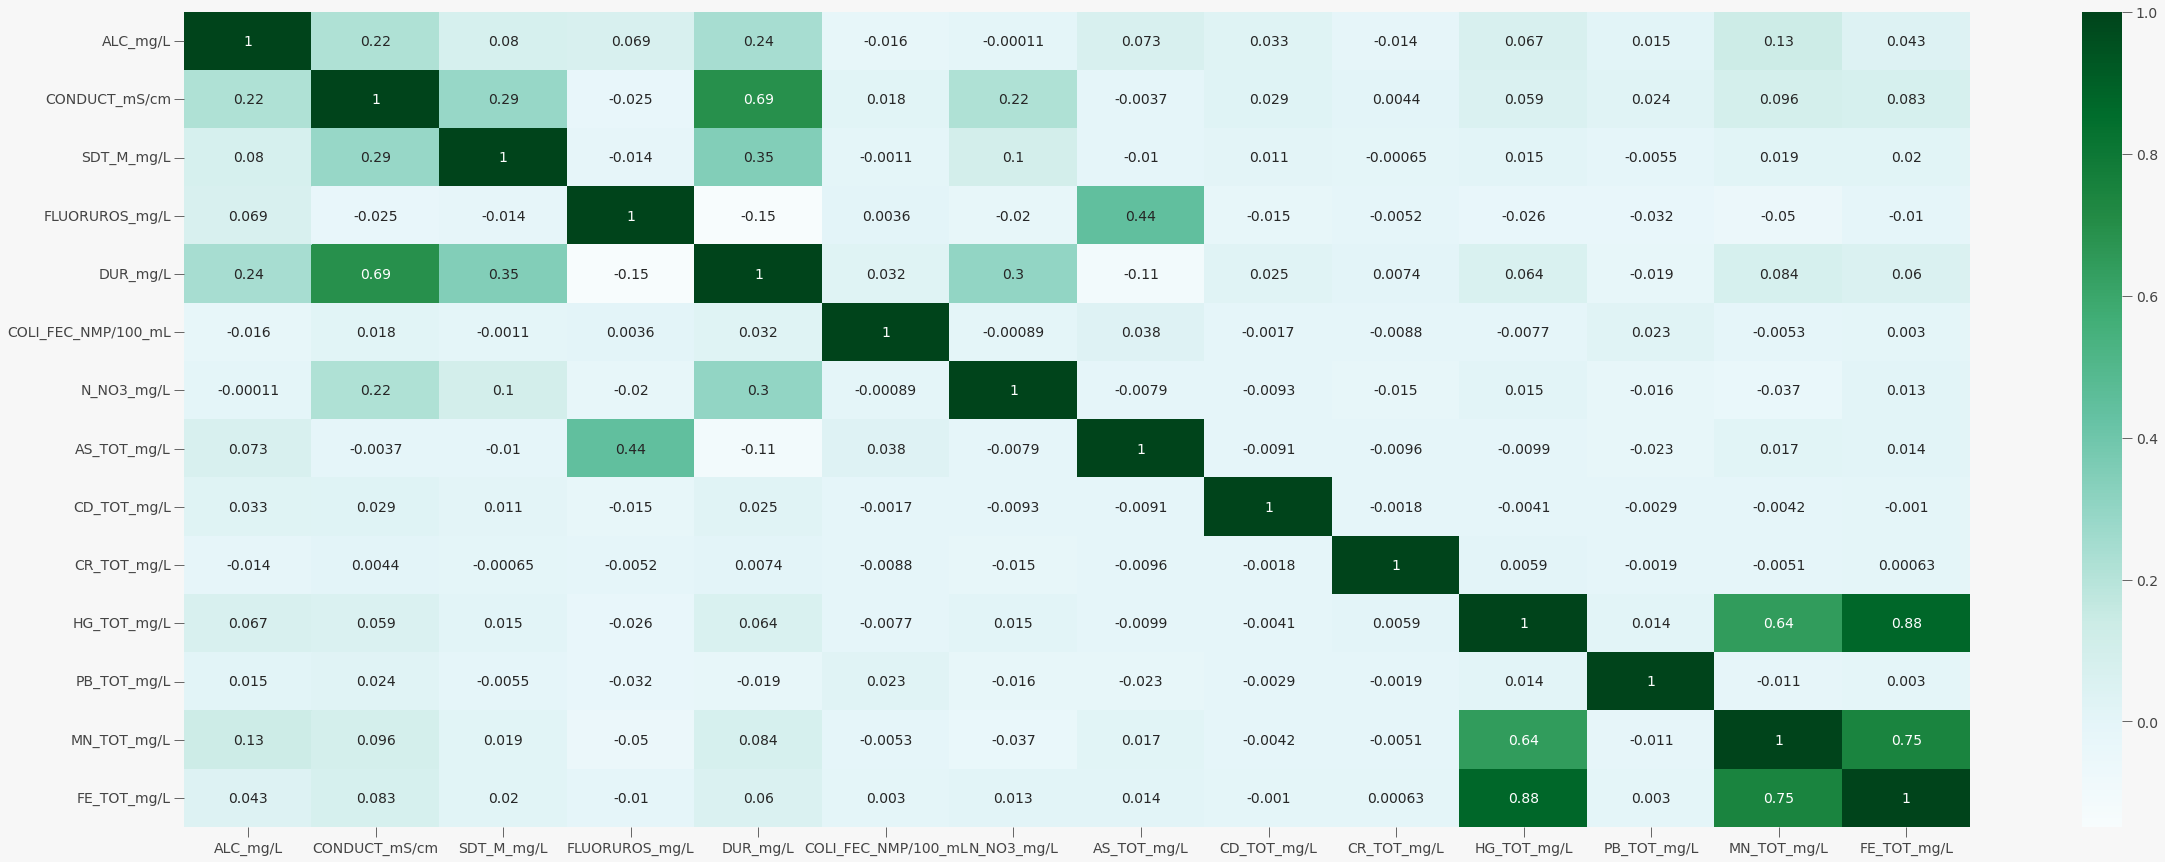

In [380]:
fig, ax = plt.subplots(figsize=(40,15))
sns.heatmap(dfSubLimpio[VariablesFinales].corr(method="pearson"),cmap='BuGn',annot=True,ax=ax)
plt.show()

In [408]:
dfSub.SEMAFORO.value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [381]:
dfSubLimpio['SEMAFORO'].value_counts() #con esto se que el 2 es verde, 1 rojo y 0 amarillo

2    434
1    387
0    247
Name: SEMAFORO, dtype: int64

([<matplotlib.axis.XTick at 0x7f37298ed150>,
 [Text(0, 0, 'Verde'), Text(0, 0, 'Rojo'), Text(0, 0, 'Amarillo')])

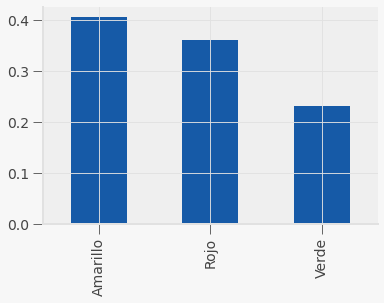

In [418]:
dfSubLimpio.SEMAFORO.value_counts(normalize=True).plot.bar()
plt.xticks([2,1,0],['Verde','Rojo','Amarillo'])

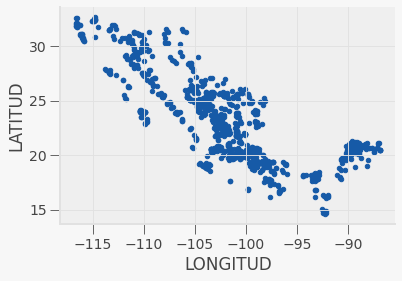

In [382]:
# 
latlong=dfSubLimpio[["LATITUD","LONGITUD"]]
latlong.plot.scatter( "LONGITUD","LATITUD")

# 4 - Realizar análisis 
para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

In [383]:
dfSubLimpio["Coordinates"] = list(zip(dfSubLimpio.LONGITUD, dfSubLimpio.LATITUD))
dfSubLimpio["Coordinates"] = dfSubLimpio["Coordinates"].apply(Point)
dfSubLimpio.head()

,CLAVE,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,...,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,SEMAFORO,Coordinates
0,DLAGU6,5,-102.02210,22.20887,229.990,0,940.0,4,603.6,1,...,2,1,1,1,1,1,1,1,2,POINT (-102.0221 22.20887)
1,DLAGU6516,5,-102.20075,21.99958,231.990,0,608.0,0,445.4,3,...,2,1,1,1,1,1,1,1,2,POINT (-102.20075 21.99958)
2,DLAGU7,5,-102.28801,22.36685,204.920,0,532.0,0,342.0,3,...,2,0,1,1,1,1,1,1,1,POINT (-102.28801 22.36685)
3,DLAGU9,5,-102.29449,22.18435,327.000,0,686.0,0,478.6,3,...,2,1,1,1,1,1,1,1,2,POINT (-102.29449 22.18435)
4,DLBAJ107,5,-110.24480,23.45138,309.885,0,1841.0,4,1179.0,0,...,1,1,1,1,1,1,1,1,1,POINT (-110.2448 23.45138)


In [384]:
gdf = gpd.GeoDataFrame(dfSubLimpio, geometry="Coordinates")
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

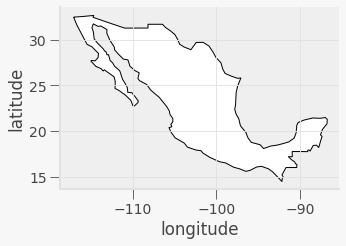

In [385]:
fig, gax = plt.subplots(figsize=(5,5))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

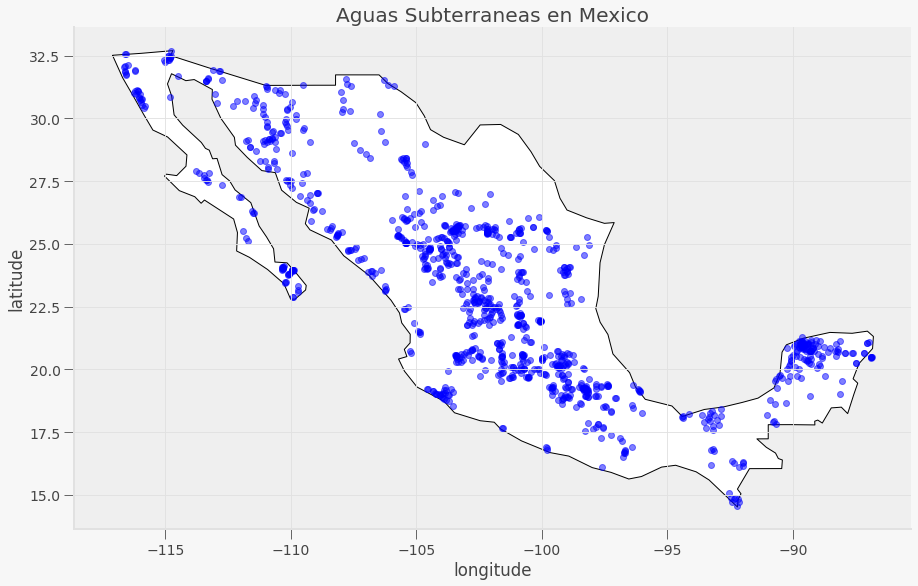

In [386]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(15,15))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Aguas Subterraneas en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [387]:
dfVerdes=dfSubLimpio.loc[dfSubLimpio['SEMAFORO']==2]
latlongV=dfVerdes[["LATITUD","LONGITUD"]]

dfRojos=dfSubLimpio.loc[dfSubLimpio['SEMAFORO']==1]
latlongR=dfRojos[["LATITUD","LONGITUD"]]

dfAmarillos=dfSubLimpio.loc[dfSubLimpio['SEMAFORO']==0]
latlongA=dfAmarillos[["LATITUD","LONGITUD"]]

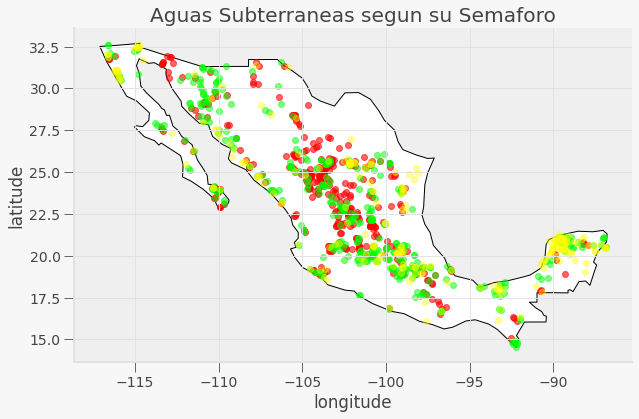

In [388]:
dfV=pd.DataFrame()
dfV["Coordinates"] = list(zip(dfVerdes.LONGITUD, dfVerdes.LATITUD))
dfV["Coordinates"] = dfV["Coordinates"].apply(Point)
gdfV = gpd.GeoDataFrame(dfV, geometry="Coordinates")

dfR=pd.DataFrame()
dfR["Coordinates"] = list(zip(dfRojos.LONGITUD, dfRojos.LATITUD))
dfR["Coordinates"] = dfR["Coordinates"].apply(Point)
gdfR = gpd.GeoDataFrame(dfR, geometry="Coordinates")

dfA=pd.DataFrame()
dfA["Coordinates"] = list(zip(dfAmarillos.LONGITUD, dfAmarillos.LATITUD))
dfA["Coordinates"] = dfA["Coordinates"].apply(Point)
gdfA = gpd.GeoDataFrame(dfA, geometry="Coordinates")



# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.

gdfR.plot(ax=gax, color='Red', alpha = .6)
gdfV.plot(ax=gax, color='Lime', alpha = .5)
gdfA.plot(ax=gax, color='Yellow', alpha = .4)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Aguas Subterraneas segun su Semaforo')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [389]:

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

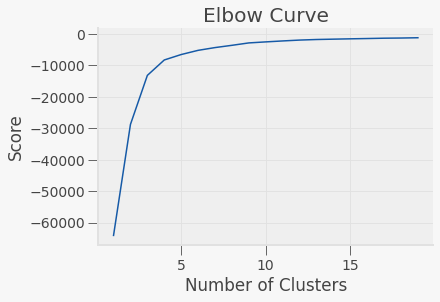

In [390]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong).score(latlong) for i in range(len(kmeans))]

plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

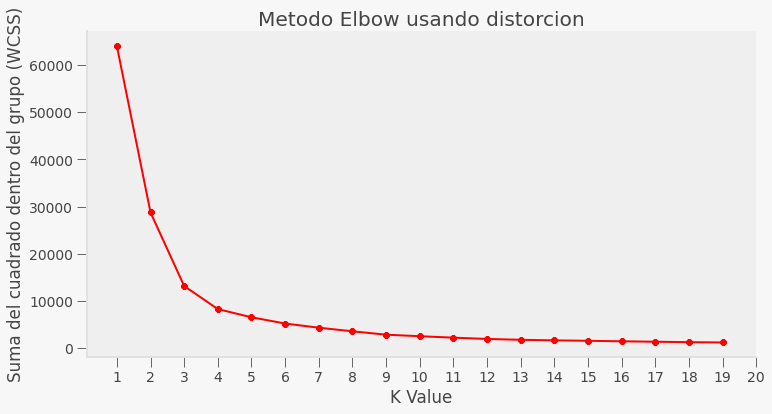

In [391]:
inertia = [kmeans[i].fit(latlong).inertia_ for i in range(len(Nc))]
inertia
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(Nc,inertia, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,21,1))
plt.title('Metodo Elbow usando distorcion')
plt.ylabel("Suma del cuadrado dentro del grupo (WCSS)")
plt.show()

In [392]:
kmeans = KMeans(n_clusters=5).fit(latlong)
identified_cluster = kmeans.fit_predict(latlong)
centroids = kmeans.cluster_centers_
centroids

array([[  19.82511781, -100.12647372],
       [  30.3068948 , -112.56254421],
       [  19.6502625 ,  -90.09271578],
       [  25.83178401, -107.78221844],
       [  24.20554738, -102.57873342]])

In [393]:
DistLat=centroids[:,0]
DistLong=centroids[:,1]

newCoordinates={'Latitude':DistLat,'Longitude':DistLong}

newCoordinates=pd.DataFrame(newCoordinates)
newCoordinates

,Latitude,Longitude
0,19.825118,-100.126474
1,30.306895,-112.562544
2,19.650263,-90.092716
3,25.831784,-107.782218
4,24.205547,-102.578733


In [394]:
# Creamos un nuevo dataframe y agregamos sus "clusters" agrupamientos
df_w_clusters = pd.DataFrame(data=dfSubLimpio,columns=['LONGITUD','LATITUD'])
df_w_clusters.columns = ['Longitud','Latitud']
df_w_clusters['Cluster'] = identified_cluster
df_w_clusters["Coordinates"] = list(zip(dfSubLimpio.LONGITUD, dfSubLimpio.LATITUD))
df_w_clusters["Coordinates"] = df_w_clusters["Coordinates"].apply(Point)
df_w_clusters

,Longitud,Latitud,Cluster,Coordinates
0,-102.02210,22.20887,4,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,4,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,4,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,4,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,3,POINT (-110.2448 23.45138)
...,...,...,...,...
1063,-99.54191,24.76036,4,POINT (-99.54191 24.76036)
1064,-99.70099,24.78280,4,POINT (-99.70099 24.7828)
1065,-99.82249,25.55197,4,POINT (-99.82249 25.55197)
1066,-100.32683,24.80118,4,POINT (-100.32683 24.80118)


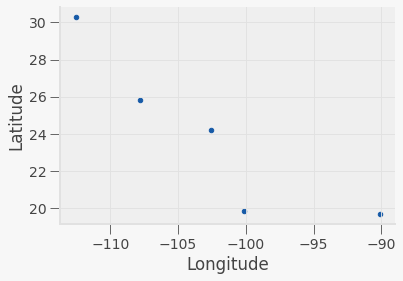

In [395]:
DistLat=centroids[:,0]
DistLong=centroids[:,1]

newCoordinates={'Latitude':DistLat,'Longitude':DistLong}

newCoordinates=pd.DataFrame(newCoordinates)
newCoordinates.plot.scatter( "Longitude","Latitude")

In [396]:
df2=pd.DataFrame()
df2["Coordinates"] = list(zip(newCoordinates.Longitude, newCoordinates.Latitude))
df2["Coordinates"] = df2["Coordinates"].apply(Point)
df2.head()

,Coordinates
0,POINT (-100.1264737191358 19.825117805555557)
1,POINT (-112.56254421212121 30.306894803030303)
2,POINT (-90.09271577777778 19.6502625)
3,POINT (-107.78221844217687 25.831784013605443)
4,POINT (-102.57873341914191 24.205547376237625)


In [397]:
gdf1 = gpd.GeoDataFrame(df2, geometry="Coordinates")

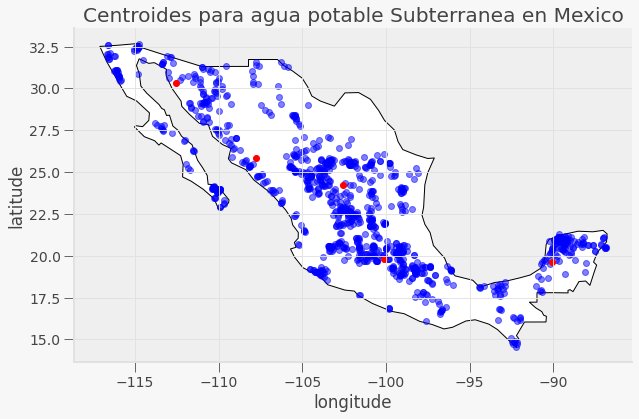

In [398]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='blue', alpha = 0.5)
gdf1.plot(ax=gax, color='red', alpha = 1)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Centroides para agua potable Subterranea en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

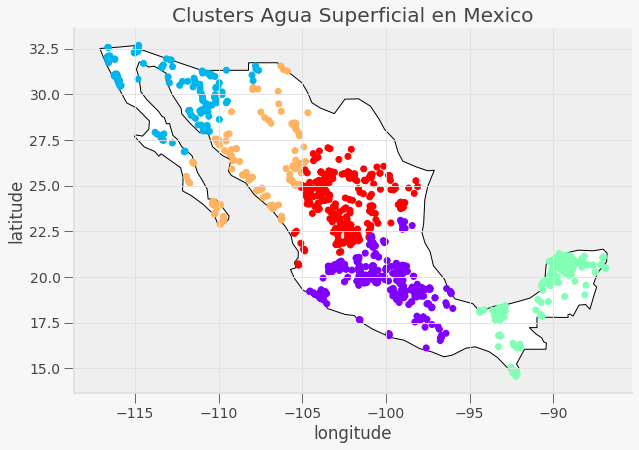

In [399]:
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')
plt.scatter(dfSubLimpio['LONGITUD'], dfSubLimpio['LATITUD'], c=df_w_clusters['Cluster'], cmap = 'rainbow')
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Clusters Agua Superficial en Mexico')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.show()

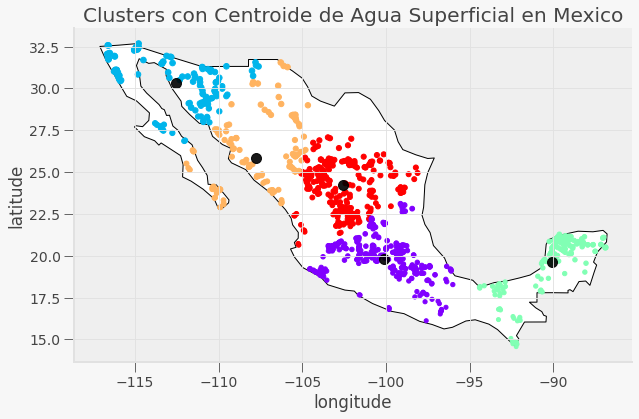

In [400]:
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')
plt.scatter(dfSubLimpio['LONGITUD'], dfSubLimpio['LATITUD'], dfSubLimpio['LATITUD'], c=df_w_clusters['Cluster'], cmap = 'rainbow')
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Clusters con Centroide de Agua Superficial en Mexico')
gdf1.plot(ax=gax, color='black', alpha = 0.9,markersize=100)
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.show()

# 5 - Selecciona tus variables independientes X y dependiente Y (semáforo)


In [401]:
X= dfSubLimpio[['ALC_mg/L',	'CALIDAD_ALC',	'CONDUCT_mS/cm',	'CALIDAD_CONDUC',	'SDT_M_mg/L',	'CALIDAD_SDT_ra',	'CALIDAD_SDT_salin',	'FLUORUROS_mg/L',	'CALIDAD_FLUO',	'DUR_mg/L',	'CALIDAD_DUR',	'COLI_FEC_NMP/100_mL',	'CALIDAD_COLI_FEC',	'N_NO3_mg/L',	'CALIDAD_N_NO3',	'AS_TOT_mg/L',	'CALIDAD_AS',	'CD_TOT_mg/L',	'CALIDAD_CD',	'CR_TOT_mg/L',	'CALIDAD_CR',	'HG_TOT_mg/L',	'CALIDAD_HG',	'PB_TOT_mg/L',	'CALIDAD_PB',	'MN_TOT_mg/L',	'CALIDAD_MN',	'FE_TOT_mg/L',	'CALIDAD_FE']]
y=dfSubLimpio['SEMAFORO']

In [402]:
X.head()

,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,...,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE
0,229.990,0,940.0,4,603.6,1,1,0.9766,3,213.7320,...,0.005,1,0.0005,1,0.005,1,0.0015,0,0.0891,0
1,231.990,0,608.0,0,445.4,3,1,0.9298,3,185.0514,...,0.005,1,0.0005,1,0.005,1,0.0015,0,0.0250,0
2,204.920,0,532.0,0,342.0,3,1,1.8045,0,120.7190,...,0.005,1,0.0005,1,0.005,1,0.0015,0,0.0250,0
3,327.000,0,686.0,0,478.6,3,1,1.1229,3,199.8790,...,0.005,1,0.0005,1,0.005,1,0.0015,0,0.0250,0
4,309.885,0,1841.0,4,1179.0,0,0,0.2343,1,476.9872,...,0.005,1,0.0005,1,0.005,1,0.0015,0,0.0250,0


In [427]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Exactitud (accuracy)')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()


**Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]**





esto ya quedo hecho desde el reto 1

**Realiza un análisis general de las features importances a traves de decision trees o random forest.**

In [433]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, learning_curve
from sklearn.model_selection import GridSearchCV



In [495]:
y[y==2].sum()#Verde
y[y==1].sum()#Rojo
y[y==0].sum()#Amarillo

0

In [443]:
y.shape[0]

1068

In [500]:
# Revisamos si hay un desbalanceo de clases 
print(X.shape, y.shape)

(1068, 29) (1068,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [464]:
from sklearn.ensemble import RandomForestClassifier
modelo=RandomForestClassifier(n_estimators=8, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=12)
modelo.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=8, n_jobs=-1,
                       random_state=12)

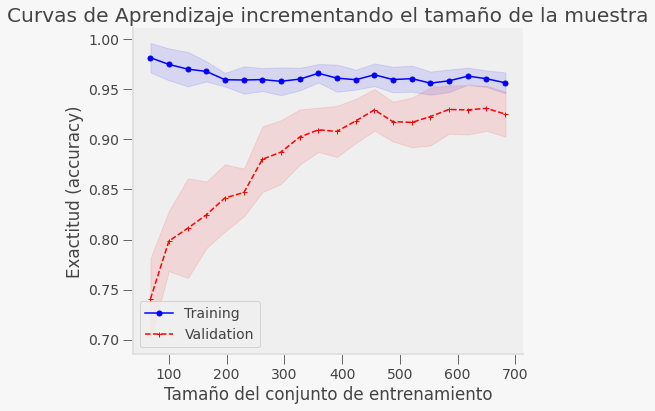

In [465]:
# Curva de Aprendizaje 
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
delta_train_sz = np.linspace(0.1, 1.0, 20)
# lPipeline = Pipeline(steps=[('ct',columnasTransformer),('m',model_randomf)])
tr_sizes, tr_scores, val_scores = learning_curve(modelo,    
                                                        X = X_train,
                                                        y = y_train,
                                                        cv = kfold ,
                                                        train_sizes = delta_train_sz,
                                                        random_state=12)
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

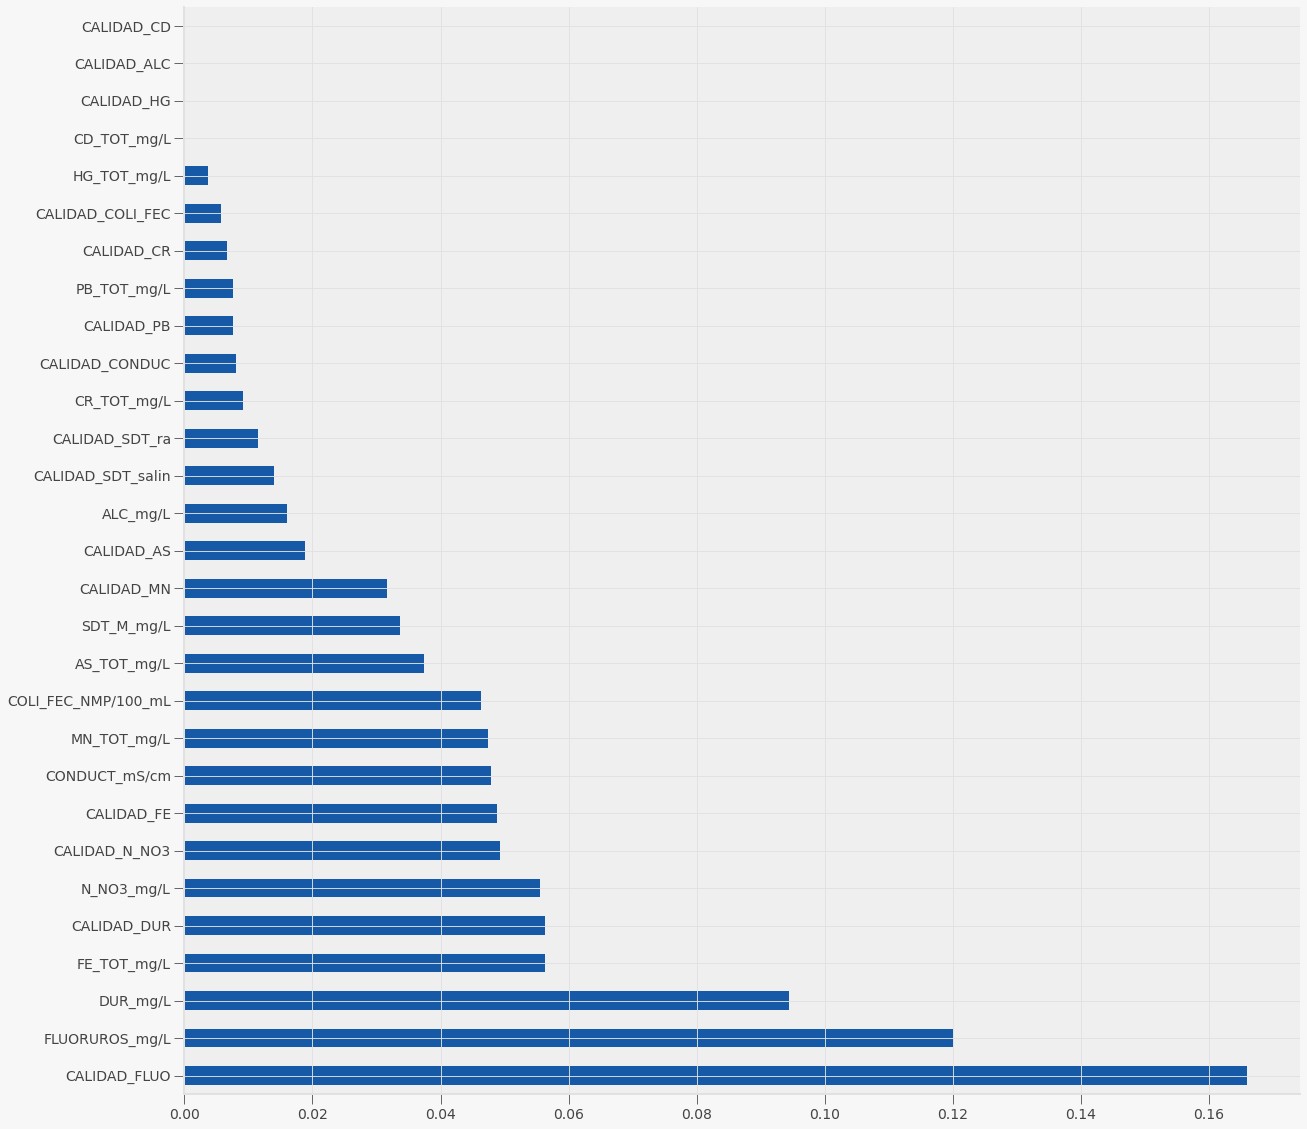

In [467]:
plt.figure(figsize=(20,20))
importance_sr = pd.Series(modelo.feature_importances_,index =X_train.columns)
importance_sr.sort_values(ascending=False).plot.barh()
plt.show()

In [451]:
from sklearn.tree import DecisionTreeClassifier
ModeloA = DecisionTreeClassifier(max_depth=5, random_state=42)
ModeloA.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [454]:
from sklearn.metrics import confusion_matrix

def mi_precision(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  precision = cm[1][1] / (cm[1][1]+cm[0][1])
  return precision

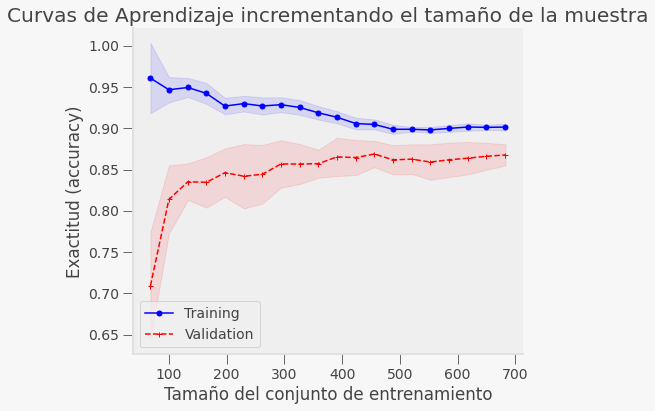

In [452]:
# Curva de Aprendizaje 
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
delta_train_sz = np.linspace(0.1, 1.0, 20)
tr_sizes, tr_scores, val_scores = learning_curve(ModeloA,    
                                                        X = X_train,
                                                        y = y_train,
                                                        cv = kfold ,
                                                        train_sizes = delta_train_sz,
                                                        random_state=11)
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

Resultado de precision: 0.986 



[Text(0.5972222222222222, 0.9166666666666666, 'X[8] <= 0.5\ngini = 0.648\nsamples = 854\nvalue = [195, 302, 357]'),
 Text(0.5416666666666666, 0.75, 'gini = 0.0\nsamples = 157\nvalue = [0, 157, 0]'),
 Text(0.6527777777777778, 0.75, 'X[9] <= 500.305\ngini = 0.616\nsamples = 697\nvalue = [195, 145, 357]'),
 Text(0.4166666666666667, 0.5833333333333334, 'X[28] <= 0.5\ngini = 0.512\nsamples = 547\nvalue = [81, 109, 357]'),
 Text(0.2222222222222222, 0.4166666666666667, 'X[15] <= 0.022\ngini = 0.423\nsamples = 487\nvalue = [43, 87, 357]'),
 Text(0.1111111111111111, 0.25, 'X[11] <= 962.5\ngini = 0.36\nsamples = 452\nvalue = [42, 55, 355]'),
 Text(0.05555555555555555, 0.08333333333333333, 'gini = 0.288\nsamples = 425\nvalue = [42, 28, 355]'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 27\nvalue = [0, 27, 0]'),
 Text(0.3333333333333333, 0.25, 'X[15] <= 0.025\ngini = 0.16\nsamples = 35\nvalue = [1, 32, 2]'),
 Text(0.2777777777777778, 0.08333333333333333, 'gini = 0.611\n

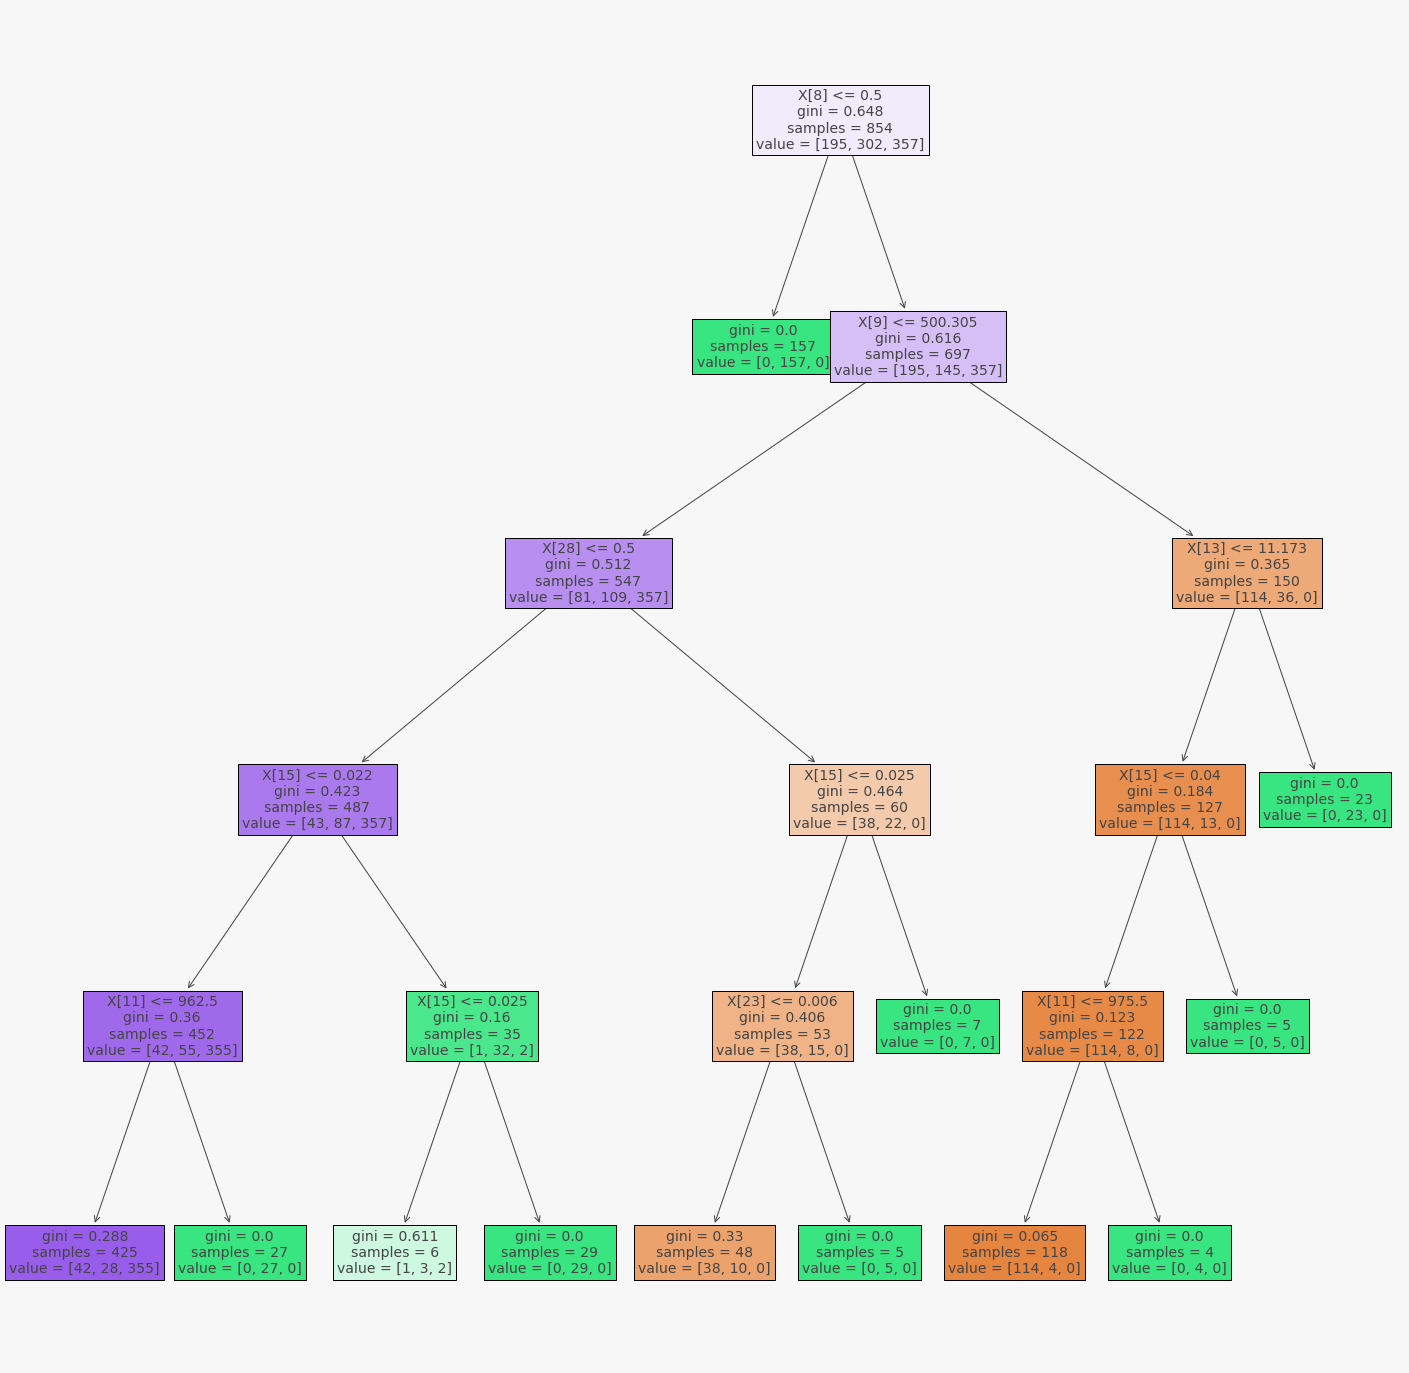

In [469]:
from sklearn import tree
plt.figure(figsize=(25,25))
ypred = ModeloA.predict(X_test)
print("Resultado de precision: %.3f \n"%(mi_precision(y_test, ypred)))
tree.plot_tree(ModeloA, filled = True, fontsize=14)


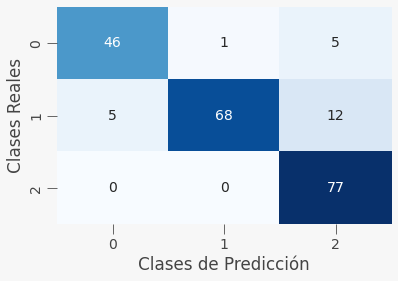

In [482]:
cm = confusion_matrix(y_test, ypred)
ax = sns.heatmap(cm, annot=True, fmt='', cmap='Blues', cbar=False)
ax.set(ylabel="Clases Reales", xlabel="Clases de Predicción")
plt.show()

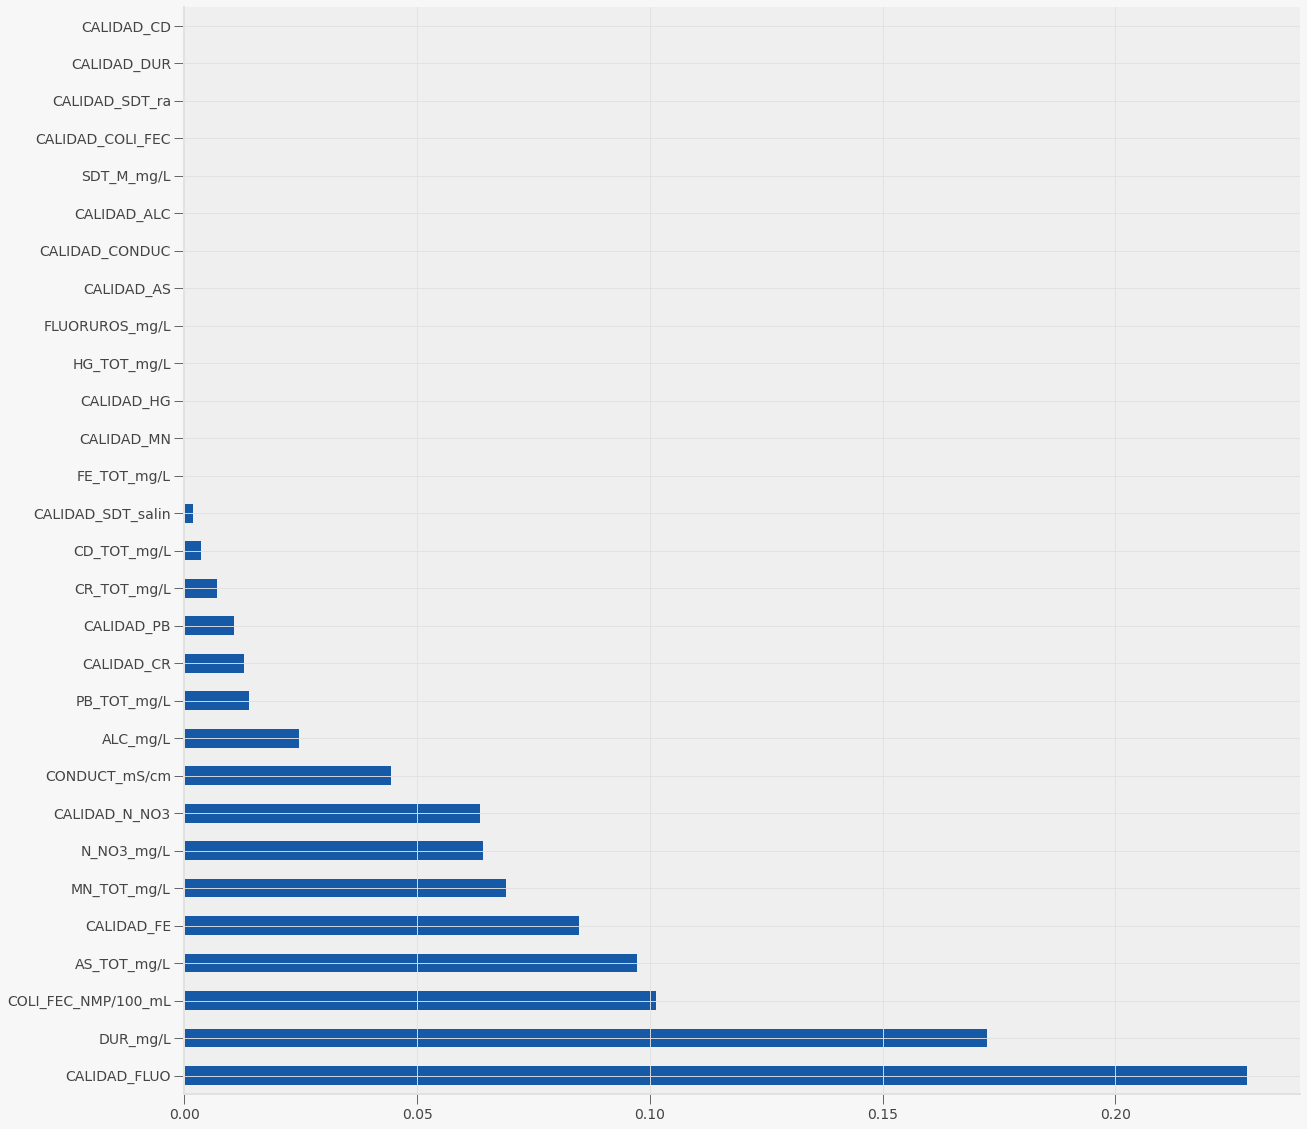

In [449]:
plt.figure(figsize=(20,20))
importance_sr_Tree = pd.Series(ModeloA.feature_importances_,index =X_train.columns)
importance_sr_Tree.sort_values(ascending=False).plot.barh()
plt.show()